In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
train_df=pd.read_csv('termdeposit_train.csv')
train_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
test_df=pd.read_csv('termdeposit_test.csv')
test_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [4]:
train_df.shape

(31647, 18)

In [5]:
test_df.shape

(13564, 17)

We can see that there are 17 similar features in the both the dataset and 'Subscribed' is the variable that is to be predicted

In [6]:
train_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [7]:
test_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [8]:
train_df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [9]:
test_df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [10]:
train_df.sample()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
9215,34893,31,unemployed,single,secondary,no,209,yes,no,cellular,6,may,193,1,-1,0,unknown,no


In [11]:
test_df.sample()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
8870,10253,29,admin.,single,secondary,no,171,yes,no,unknown,11,jun,83,10,-1,0,unknown


Checking data types of the variables.

In [12]:
train_df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [13]:
test_df.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [14]:
train_df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

Here, 'Subscribed' is the target variable.

In [15]:
test_df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


<Axes: >

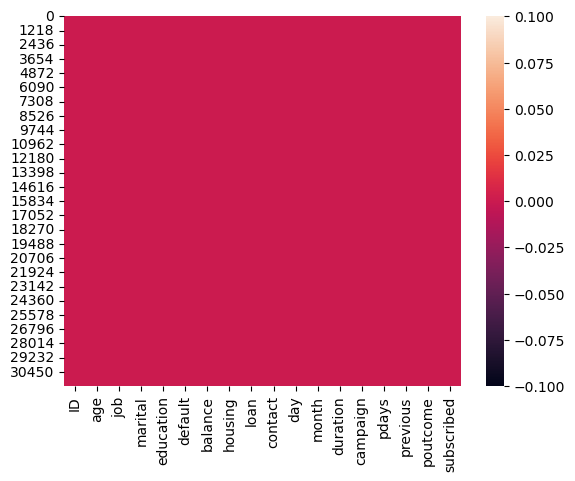

In [18]:
# To check misssing values in columns

sns.heatmap(train_df.isnull())

<Axes: >

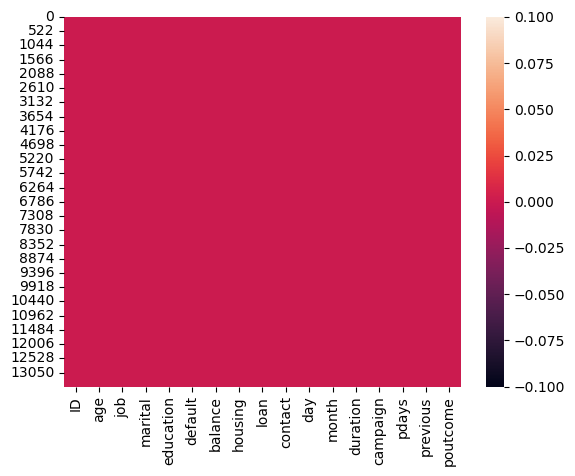

In [19]:
# To check misssing values in columns

sns.heatmap(test_df.isnull())

In [20]:
train_df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [21]:
test_df.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

There are no null values present in both the datasets.

In [22]:
train_df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

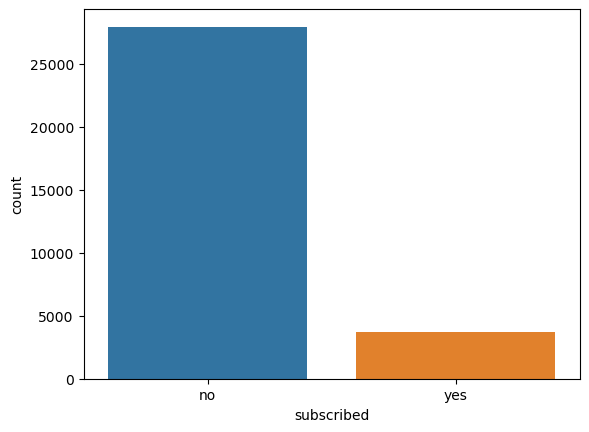

In [23]:
sns.countplot(data=train_df, x='subscribed')

In [24]:
train_df['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

<Axes: >

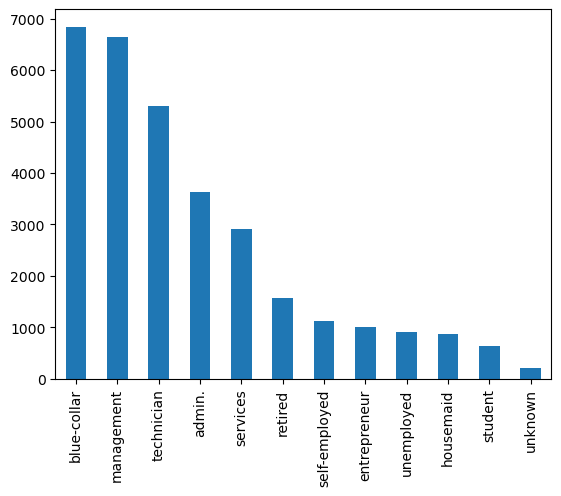

In [25]:
train_df['job'].value_counts().plot.bar()

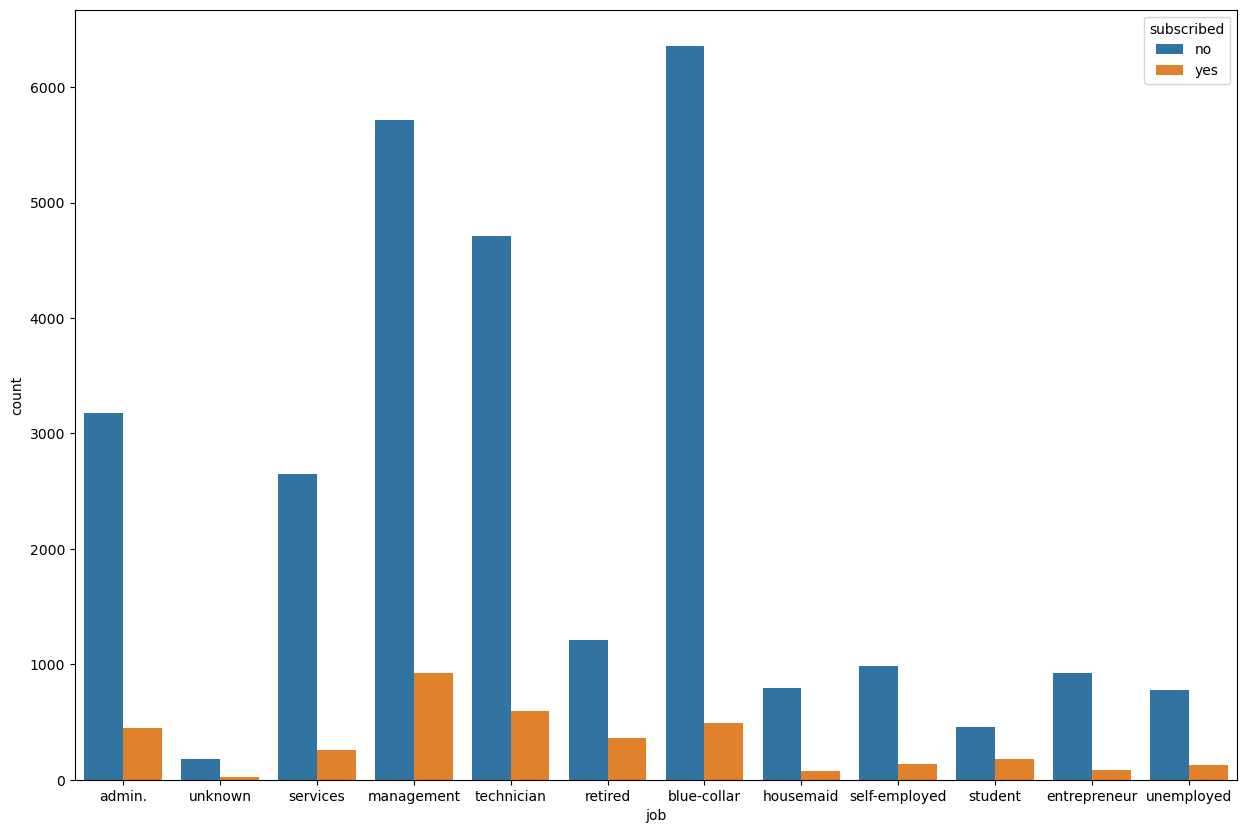

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_df, x='job', hue='subscribed')
plt.show()

In [27]:
train_df['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

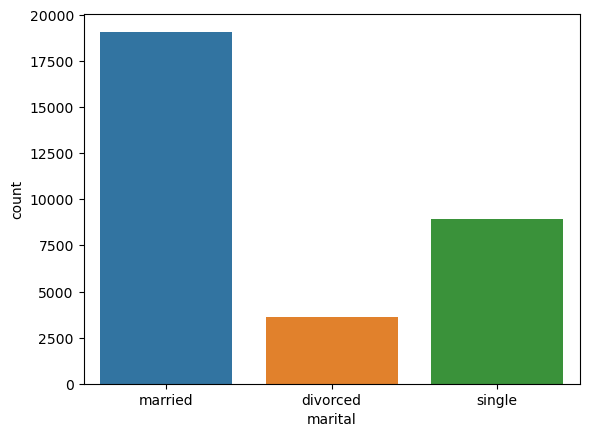

In [28]:
sns.countplot(data=train_df, x='marital')

<Axes: xlabel='marital', ylabel='count'>

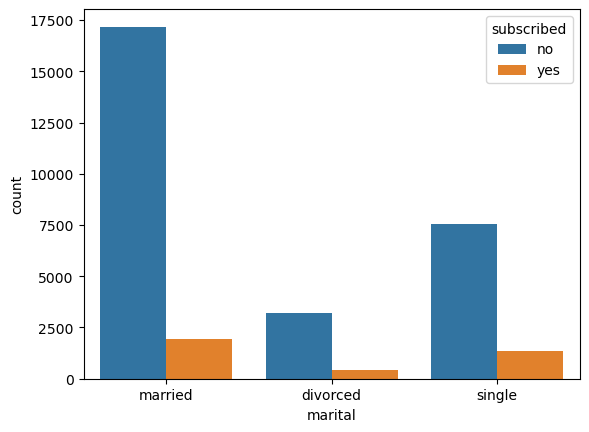

In [29]:
sns.countplot(data=train_df, x='marital', hue='subscribed')

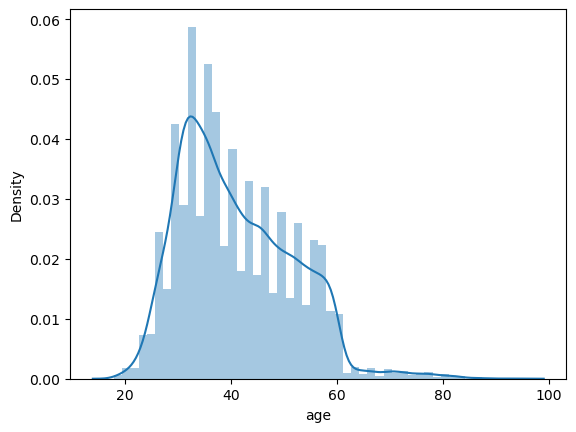

In [30]:
sns.distplot(train_df['age']);

In [31]:
train_df['month'].value_counts()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

<Axes: xlabel='month', ylabel='count'>

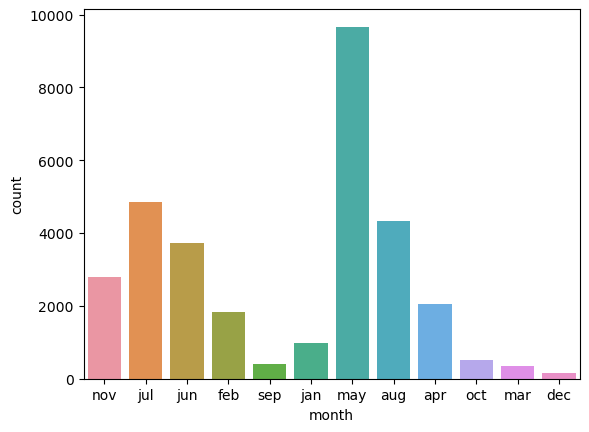

In [32]:
sns.countplot(data=train_df, x='month')

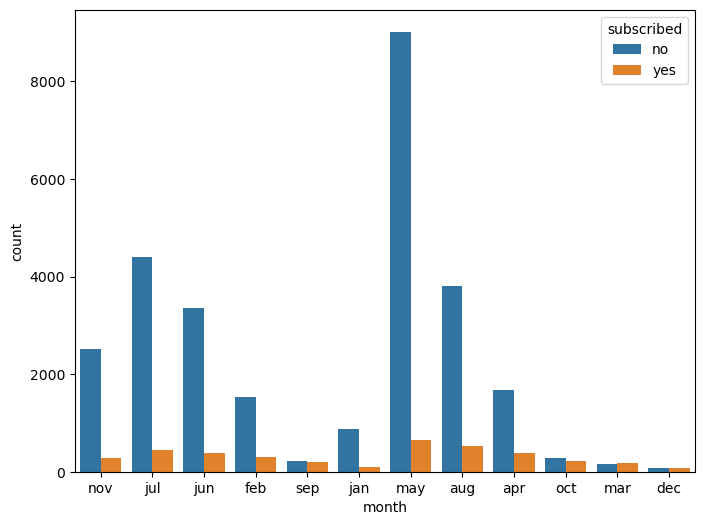

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(data=train_df, x='month', hue='subscribed')
plt.show()

In [34]:
train_df['duration'].value_counts()

90      135
124     130
139     127
88      127
104     127
       ... 
1405      1
1090      1
1261      1
1218      1
1973      1
Name: duration, Length: 1454, dtype: int64

<Axes: xlabel='duration', ylabel='count'>

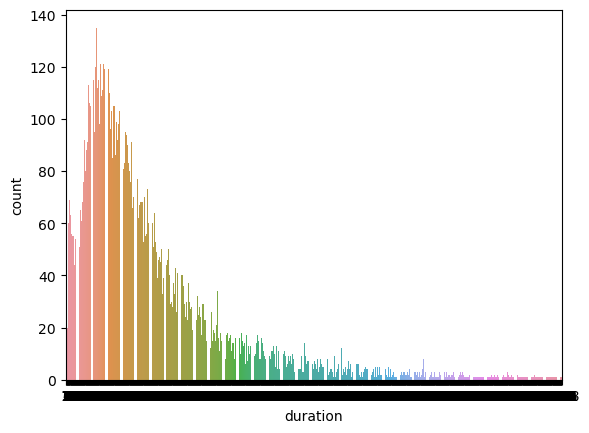

In [35]:
sns.countplot(data=train_df, x='duration')

Data Encoding as to replace target variable categorical data to numerical

In [36]:
train_df['subscribed'].replace('no', 0, inplace=True)
train_df['subscribed'].replace('yes', 1, inplace=True)

In [37]:
train_df['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [38]:
#Checking correlation

traindf_cor=train_df.corr()
traindf_cor

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


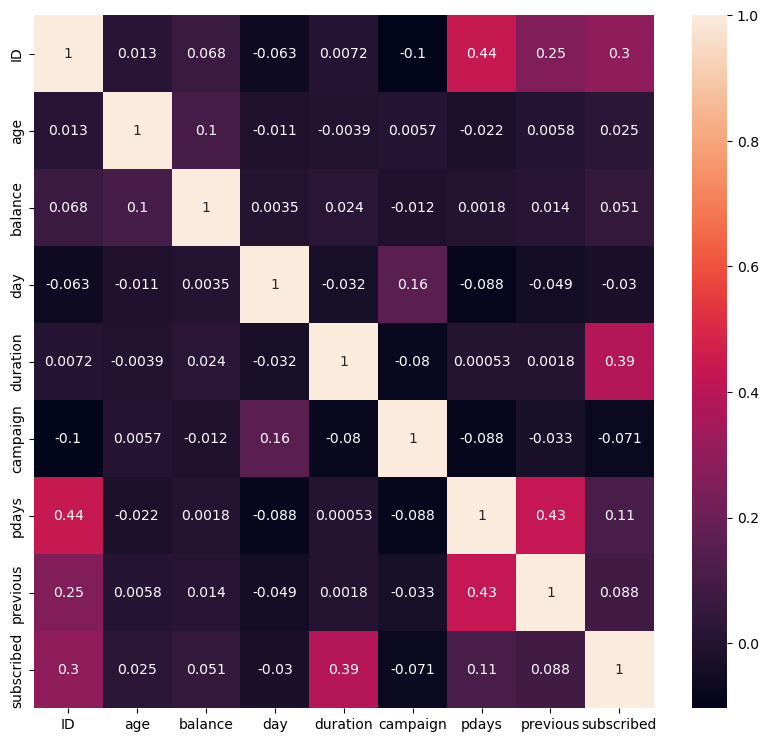

In [39]:
plt.figure(figsize=(10,9))
sns.heatmap(traindf_cor,annot=True)
plt.show()

We can see that duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

# Implementing Machine Learning thru Logistic Regression

In [40]:
x=train_df.drop('subscribed',axis=1)
y=train_df['subscribed']

Seperated target and its features so that x only has input variables and y only has output variable

In [41]:
# Getting dummies to convert Categorical variables into columns for train dataset.

x=pd.get_dummies(x)
x.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

Creating train test split

Training phase will get 80% of distribution and testing phase will get 20% of distribution.

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25317, 52)
(6330, 52)
(25317,)
(6330,)


In [44]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [45]:
LRpred=LR.predict(x_test)
LRpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
accuracy_score(y_test,LRpred)

0.8875197472353871

In [47]:
confusion_matrix(y_test,LRpred)

array([[5455,  144],
       [ 568,  163]], dtype=int64)

In [48]:
print(classification_report(y_test,LRpred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5599
           1       0.53      0.22      0.31       731

    accuracy                           0.89      6330
   macro avg       0.72      0.60      0.63      6330
weighted avg       0.86      0.89      0.87      6330



The accuracy score using Logistic Regression is 88.75%

In [51]:
LR.score(x_test,LRpred)

1.0

# Using Decision Tree Classifier

In [52]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
DTCpred=DTC.predict(x_test)
DTCpred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [54]:
accuracy_score(y_test,DTCpred)

0.8830963665086888

The accuracy score using Logistic Regression is 88.30%

In [55]:
DTC.score(x_test,DTCpred)

1.0

In [56]:
# Getting dummies to convert Categorical variables into columns for test dataset.

test = pd.get_dummies(test_df)
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [57]:
test_pred=DTC.predict(test)
test_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [58]:
DTC.score(test,test_pred)

1.0

In [61]:
test['subscribed']=test_pred

In [62]:
test['subscribed'].replace(0, 'no', inplace=True)
test['subscribed'].replace(1, 'yes', inplace=True)

In [63]:
test

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,subscribed
0,38441,32,118,15,20,6,-1,0,0,0,...,0,1,0,0,0,0,0,0,1,no
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,no
2,3709,31,144,16,676,1,-1,0,0,0,...,0,1,0,0,0,0,0,0,1,no
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,1,0,0,0,0,0,0,1,no
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,45,28,148,4,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,no
13560,11743,54,2281,20,158,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,1,no
13561,28292,35,285,29,136,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,no
13562,45163,29,464,9,208,2,91,3,1,0,...,0,0,1,0,0,0,0,1,0,yes
